In [85]:
pwd

'/home/clu/cilia/nbs'

In [86]:
IMG_PATH = '/home/clu/cilia/frame_images/'
MASK_PATH = '/home/clu/cilia/ground/'
SIZE = (256, 256)
BATCH = 4
NUM_VIDS = 297
NUM_TRAIN = 200

## imports

In [102]:
import math, datetime, json, os, glob, threading, re, collections, functools, itertools, shutil
import pandas as pd, numpy as np, matplotlib.pyplot as plt, sklearn, scipy
import keras, operator, pickle, random, keras.backend as K, tensorflow as tf
from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
from PIL import Image
from tensorflow.python.framework import ops
from keras import initializers
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.regularizers import l2
%matplotlib inline

In [88]:
def limit_mem():
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

In [89]:
frames_path = os.listdir(IMG_PATH)

In [90]:
def open_image(img, one_channel=False, resize=False):
    if resize: 
        img = Image.open(img).resize(SIZE, Image.NEAREST)
    else: 
        img = Image.open(img)
        
    if one_channel: 
        return np.array(img.convert('L'))
    
    return np.array(img)

In [91]:
random.seed(0)

## load data

In [92]:
frame_0 = [IMG_PATH + frames_path[0] + '/' + x for x in os.listdir(IMG_PATH + frames_path[0])]
frame_1 = [IMG_PATH + frames_path[1] + '/' + x for x in os.listdir(IMG_PATH + frames_path[1])]
frame_2 = [IMG_PATH + frames_path[2] + '/' + x for x in os.listdir(IMG_PATH + frames_path[2])]
frame_3 = [IMG_PATH + frames_path[3] + '/' + x for x in os.listdir(IMG_PATH + frames_path[3])]
frame_4 = [IMG_PATH + frames_path[4] + '/' + x for x in os.listdir(IMG_PATH + frames_path[4])]
frame_5 = [IMG_PATH + frames_path[5] + '/' + x for x in os.listdir(IMG_PATH + frames_path[5])]
frame_6 = [IMG_PATH + frames_path[6] + '/' + x for x in os.listdir(IMG_PATH + frames_path[6])]
frame_7 = [IMG_PATH + frames_path[7] + '/' + x for x in os.listdir(IMG_PATH + frames_path[7])]
frame_8 = [IMG_PATH + frames_path[8] + '/' + x for x in os.listdir(IMG_PATH + frames_path[8])]
frame_9 = [IMG_PATH + frames_path[9] + '/' + x for x in os.listdir(IMG_PATH + frames_path[9])]
frame_10 = [IMG_PATH + frames_path[10] + '/' + x for x in os.listdir(IMG_PATH + frames_path[10])]
frame_11 = [IMG_PATH + frames_path[11] + '/' + x for x in os.listdir(IMG_PATH + frames_path[11])]
frame_12 = [IMG_PATH + frames_path[12] + '/' + x for x in os.listdir(IMG_PATH + frames_path[12])]
frame_13 = [IMG_PATH + frames_path[13] + '/' + x for x in os.listdir(IMG_PATH + frames_path[13])]
frame_14 = [IMG_PATH + frames_path[14] + '/' + x for x in os.listdir(IMG_PATH + frames_path[14])]
frame_15 = [IMG_PATH + frames_path[15] + '/' + x for x in os.listdir(IMG_PATH + frames_path[15])]

frame_0.sort();  frame_1.sort();  frame_2.sort();  frame_3.sort();
frame_4.sort();  frame_5.sort();  frame_6.sort();  frame_7.sort();
frame_8.sort();  frame_9.sort();  frame_10.sort(); frame_11.sort();
frame_12.sort(); frame_13.sort(); frame_14.sort(); frame_15.sort();

In [93]:
# this takes a while to load into memory
frame_0_imgs = [open_image(x) for x in frame_0]
frame_0_imgs_resize = [open_image(x, resize=True) for x in frame_0]

frame_1_imgs = [open_image(x) for x in frame_1]
frame_1_imgs_resize = [open_image(x, resize=True) for x in frame_1]

frame_2_imgs = [open_image(x) for x in frame_2]
frame_2_imgs_resize = [open_image(x, resize=True) for x in frame_2]

frame_3_imgs = [open_image(x) for x in frame_3]
frame_3_imgs_resize = [open_image(x, resize=True) for x in frame_3]

frame_4_imgs = [open_image(x) for x in frame_4]
frame_4_imgs_resize = [open_image(x, resize=True) for x in frame_4]

frame_5_imgs = [open_image(x) for x in frame_5]
frame_5_imgs_resize = [open_image(x, resize=True) for x in frame_5]

frame_6_imgs = [open_image(x) for x in frame_6]
frame_6_imgs_resize = [open_image(x, resize=True) for x in frame_6]

frame_7_imgs = [open_image(x) for x in frame_7]
frame_7_imgs_resize = [open_image(x, resize=True) for x in frame_7]

frame_8_imgs = [open_image(x) for x in frame_8]
frame_8_imgs_resize = [open_image(x, resize=True) for x in frame_8]

frame_9_imgs = [open_image(x) for x in frame_9]
frame_9_imgs_resize = [open_image(x, resize=True) for x in frame_9]

frame_10_imgs = [open_image(x) for x in frame_10]
frame_10_imgs_resize = [open_image(x, resize=True) for x in frame_10]

frame_11_imgs = [open_image(x) for x in frame_11]
frame_11_imgs_resize = [open_image(x, resize=True) for x in frame_11]

frame_12_imgs = [open_image(x) for x in frame_12]
frame_12_imgs_resize = [open_image(x, resize=True) for x in frame_12]

frame_13_imgs = [open_image(x) for x in frame_13]
frame_13_imgs_resize = [open_image(x, resize=True) for x in frame_13]

frame_14_imgs = [open_image(x) for x in frame_14]
frame_14_imgs_resize = [open_image(x, resize=True) for x in frame_14]

frame_15_imgs = [open_image(x) for x in frame_15]
frame_15_imgs_resize = [open_image(x, resize=True) for x in frame_15]

In [94]:
# normalize
for i, v in enumerate(frame_0_imgs): frame_0_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_0_imgs_resize): frame_0_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_1_imgs): frame_1_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_1_imgs_resize): frame_1_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_2_imgs): frame_2_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_2_imgs_resize): frame_2_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_3_imgs): frame_3_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_3_imgs_resize): frame_3_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_4_imgs): frame_4_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_4_imgs_resize): frame_4_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_5_imgs): frame_5_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_5_imgs_resize): frame_5_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_6_imgs): frame_6_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_6_imgs_resize): frame_6_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_7_imgs): frame_7_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_7_imgs_resize): frame_7_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_8_imgs): frame_8_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_8_imgs_resize): frame_8_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_9_imgs): frame_9_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_9_imgs_resize): frame_9_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_10_imgs): frame_10_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_10_imgs_resize): frame_10_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_11_imgs): frame_11_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_11_imgs_resize): frame_11_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_12_imgs): frame_12_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_12_imgs_resize): frame_12_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_13_imgs): frame_13_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_13_imgs_resize): frame_13_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_14_imgs): frame_14_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_14_imgs_resize): frame_14_imgs_resize[i] = np.divide(v, 255.)
    
for i, v in enumerate(frame_15_imgs): frame_15_imgs[i] = np.divide(v, 255.)
for i, v in enumerate(frame_15_imgs_resize): frame_15_imgs_resize[i] = np.divide(v, 255.)

In [95]:
def make_fold(fold=1, same_test=True, shuffle=True):
    videos = [i for i in range(NUM_VIDS)]
    if shuffle: random.shuffle(videos)
    
    fold1 = [x for i,x in enumerate(videos) if i % 3 == 0]
    fold2 = [x for i,x in enumerate(videos) if i % 3 == 1]
    fold3 = [x for i,x in enumerate(videos) if i % 3 == 2]
    
    if fold == 1:
        A = fold3
        B = fold2
        C = fold1
    elif fold == 2:
        A = fold1
        B = fold3
        C = fold2
    elif fold == 3:
        A = fold1
        B = fold2
        C = fold3
    else:
        print('fold must be 1, 2, or 3')
        return
    
    if same_test:
        train_idx = A + B
        valid_idx = C
        test_idx = valid_idx
    else:
        train_idx = A
        valid_idx = B
        test_idx = C
    
    train_imgs0 = [frame_0_imgs[i] for i in train_idx]
    valid_imgs0 = [frame_0_imgs[i] for i in valid_idx]
    test_imgs0 = [frame_0_imgs_resize[i] for i in test_idx]

    train_imgs1 = [frame_1_imgs[i] for i in train_idx]
    valid_imgs1 = [frame_1_imgs[i] for i in valid_idx]
    test_imgs1 = [frame_1_imgs_resize for i in test_idx]

    train_imgs2 = [frame_2_imgs[i] for i in train_idx]
    valid_imgs2 = [frame_2_imgs[i] for i in valid_idx]
    test_imgs2 = [frame_2_imgs_resize[i] for i in test_idx]

    train_imgs3 = [frame_3_imgs[i] for i in train_idx]
    valid_imgs3 = [frame_3_imgs[i] for i in valid_idx]
    test_imgs3 = [frame_3_imgs_resize[i] for i in test_idx]

    train_imgs4 = [frame_4_imgs[i] for i in train_idx]
    valid_imgs4 = [frame_4_imgs[i] for i in valid_idx]
    test_imgs4 = [frame_4_imgs_resize[i] for i in test_idx]

    train_imgs5 = [frame_5_imgs[i] for i in train_idx]
    valid_imgs5 = [frame_5_imgs[i] for i in valid_idx]
    test_imgs5 = [frame_5_imgs_resize[i] for i in test_idx]

    train_imgs6 = [frame_6_imgs[i] for i in train_idx]
    valid_imgs6 = [frame_6_imgs[i] for i in valid_idx]
    test_imgs6 = [frame_6_imgs_resize[i] for i in test_idx]

    train_imgs7 = [frame_7_imgs[i] for i in train_idx]
    valid_imgs7 = [frame_7_imgs[i] for i in valid_idx]
    test_imgs7 = [frame_7_imgs_resize[i] for i in test_idx]

    train_imgs8 = [frame_8_imgs[i] for i in train_idx]
    valid_imgs8 = [frame_8_imgs[i] for i in valid_idx]
    test_imgs8 = [frame_8_imgs_resize[i] for i in test_idx]

    train_imgs9 = [frame_9_imgs[i] for i in train_idx]
    valid_imgs9 = [frame_9_imgs[i] for i in valid_idx]
    test_imgs9 = [frame_9_imgs_resize[i] for i in test_idx]

    train_imgs10 = [frame_10_imgs[i] for i in train_idx]
    valid_imgs10 = [frame_10_imgs[i] for i in valid_idx]
    test_imgs10 = [frame_10_imgs_resize[i] for i in test_idx]

    train_imgs11 = [frame_11_imgs[i] for i in train_idx]
    valid_imgs11 = [frame_11_imgs[i] for i in valid_idx]
    test_imgs11 = [frame_11_imgs_resize[i] for i in test_idx]

    train_imgs12 = [frame_12_imgs[i] for i in train_idx]
    valid_imgs12 = [frame_12_imgs[i] for i in valid_idx]
    test_imgs12 = [frame_12_imgs_resize[i] for i in test_idx]

    train_imgs13 = [frame_13_imgs[i] for i in train_idx]
    valid_imgs13 = [frame_13_imgs[i] for i in valid_idx]
    test_imgs13 = [frame_13_imgs_resize[i] for i in test_idx]

    train_imgs14 = [frame_14_imgs[i] for i in train_idx]
    valid_imgs14 = [frame_14_imgs[i] for i in valid_idx]
    test_imgs14 = [frame_14_imgs_resize[i] for i in test_idx]

    train_imgs15 = [frame_15_imgs[i] for i in train_idx]
    valid_imgs15 = [frame_15_imgs[i] for i in valid_idx]
    test_imgs15 = [frame_15_imgs_resize[i] for i in test_idx]
    
    return  train_imgs0, valid_imgs0, test_imgs0, \
            train_imgs1, valid_imgs1, test_imgs1, \
            train_imgs2, valid_imgs2, test_imgs2, \
            train_imgs3, valid_imgs3, test_imgs3, \
            train_imgs4, valid_imgs4, test_imgs4, \
            train_imgs5, valid_imgs5, test_imgs5, \
            train_imgs6, valid_imgs6, test_imgs6, \
            train_imgs7, valid_imgs7, test_imgs7, \
            train_imgs8, valid_imgs8, test_imgs8, \
            train_imgs9, valid_imgs9, test_imgs9, \
            train_imgs10,valid_imgs10,test_imgs10,\
            train_imgs11,valid_imgs11,test_imgs11,\
            train_imgs12,valid_imgs12,test_imgs12,\
            train_imgs13,valid_imgs13,test_imgs13,\
            train_imgs14,valid_imgs14,test_imgs14,\
            train_imgs15,valid_imgs15,test_imgs15,\
            train_idx, valid_idx, test_idx

In [96]:
tr0,va0,te0,tr1,va1,te1,tr2,va2,te2,tr3,va3,te3, \
tr4,va4,te4,tr5,va5,te5,tr6,va6,te6,tr7,va7,te7, \
tr8,va8,te8,tr9,va9,te9,tr10,va10,te10,tr11,va11,te11, \
tr12,va12,te12,tr13,va13,te13,tr14,va14,te14,tr15,va15,te15,\
train_idx, valid_idx, test_idx = make_fold()

In [97]:
# only load masks found in images
def make_mask_labels(MASK_PATH, train_idx, valid_idx, test_idx):
    ground_path = []
    for i, mask in enumerate(os.listdir(MASK_PATH)):
        m = os.path.split(mask)[1]
        if m in os.listdir(IMG_PATH + '/0_frames'):
            ground_path.append(MASK_PATH + m)

    ground_path.sort()
    
    train_labs = [open_image(ground_path[i], one_channel=True) for i in train_idx]
    valid_labs = [open_image(ground_path[i], one_channel=True) for i in valid_idx]
    test_labs = [open_image(ground_path[i], one_channel=True, resize=True) for i in test_idx]

    train_labs = [np.where(arr == 64, 1, arr) for arr in train_labs]
    train_labs = [np.where(arr == 128, 2, arr) for arr in train_labs]
    train_labs = [np.where(arr == 192, 3, arr) for arr in train_labs]
    valid_labs = [np.where(arr == 64, 1, arr) for arr in valid_labs]
    valid_labs = [np.where(arr == 128, 2, arr) for arr in valid_labs]
    valid_labs = [np.where(arr == 192, 3, arr) for arr in valid_labs]
    test_labs = [np.where(arr == 64, 1, arr) for arr in test_labs]
    test_labs = [np.where(arr == 128, 2, arr) for arr in test_labs]
    test_labs = [np.where(arr == 192, 3, arr) for arr in test_labs]
    
    return train_labs, valid_labs, test_labs

In [98]:
train_labs, valid_labs, test_labs = make_mask_labels(MASK_PATH, train_idx, valid_idx, test_idx)

In [99]:
a, b = next(valid_generator0)

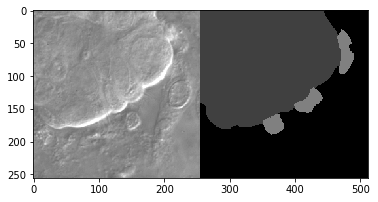

In [106]:
img, lab = next(train_generator5)
n = 0
plt.imshow(np.hstack([img[n][:, :, 0], np.divide(np.reshape(lab[n], SIZE), 4)]), cmap='gray')
# plt.show()

In [51]:
class BatchIndices(object):
    def __init__(self, n, bs, shuffle=False):
        self.n = n
        self.bs = bs 
        self.shuffle = shuffle
        self.lock = threading.Lock()
        self.reset()
        
    def reset(self):
        self.idxs = (np.random.permutation(self.n) if self.shuffle else np.arange(0, self.n))
        self.curr = 0
        
    def __next__(self):
        with self.lock:
            if self.curr >= self.n:
                self.reset()
            ni = min(self.bs, self.n - self.curr)
            res = self.idxs[self.curr: self.curr + ni]
            self.curr += ni
            return res

class Segment_generator(object):
    def __init__(self, X, y, bs=16, size=SIZE, flip=True, shuffle=False):
        self.data = X
        self.masks = y
        self.n = len(X)
        self.bs = bs
        self.flip = flip
        self.shuffle = shuffle
        self.size = size
        self.index_gen = BatchIndices(self.n, self.bs, self.shuffle)

    def crop_image(self, idx):
        image, label = self.data[idx], self.masks[idx]
        if image.shape[0] < SIZE[0] or image.shape[1] < SIZE[1]:
            print('BAD SHAPE')
            return
        if self.flip:
            if random.random() > 0.5:
                image = image[:, ::-1]
                label = label[:, ::-1]
            if random.random() > 0.5:
                image = image[::-1, :]
                label = label[::-1, :]
        
        row_start = random.randint(0, image.shape[0] - self.size[0])
        row_end = row_start + self.size[0]
        col_start = random.randint(0, image.shape[1] - self.size[1])
        col_end = col_start + self.size[1]
        img = image[row_start:row_end, col_start:col_end]
        lab = label[row_start:row_end, col_start:col_end]
        return img, lab
    
    def __next__(self):
        indexes = next(self.index_gen)
        items = (self.crop_image(idx) for idx in indexes)
        img, lab = zip(*items)
        imgs = np.stack(np.array(img))
        labs = np.stack(np.array(lab))
        labs = labs.reshape(len(lab), -1, 1)
        return imgs, labs

In [52]:
# check for bad shapes
for i, v  in enumerate(train_labs):
    if v.shape[0] < 256 or v.shape[1] < 256:
        print(v.shape)

## make data generators

In [108]:
train_generator0 = Segment_generator(tr0, train_labs, BATCH)
train_generator1 = Segment_generator(tr1, train_labs, BATCH)
train_generator2 = Segment_generator(tr2, train_labs, BATCH)
train_generator3 = Segment_generator(tr3, train_labs, BATCH)
train_generator4 = Segment_generator(tr4, train_labs, BATCH)
train_generator5 = Segment_generator(tr5, train_labs, BATCH)
train_generator6 = Segment_generator(tr6, train_labs, BATCH)
train_generator7 = Segment_generator(tr7, train_labs, BATCH)
train_generator8 = Segment_generator(tr8, train_labs, BATCH)
train_generator9 = Segment_generator(tr9, train_labs, BATCH)
train_generator10 = Segment_generator(tr10, train_labs, BATCH)
train_generator11 = Segment_generator(tr11, train_labs, BATCH)
train_generator12 = Segment_generator(tr12, train_labs, BATCH)
train_generator13 = Segment_generator(tr13, train_labs, BATCH)
train_generator14 = Segment_generator(tr14, train_labs, BATCH)
train_generator15 = Segment_generator(tr15, train_labs, BATCH)

valid_generator0 = Segment_generator(va0, valid_labs, BATCH, shuffle=True)
valid_generator1 = Segment_generator(va1, valid_labs, BATCH, shuffle=True)
valid_generator2 = Segment_generator(va2, valid_labs, BATCH, shuffle=True)
valid_generator3 = Segment_generator(va3, valid_labs, BATCH, shuffle=True)
valid_generator4 = Segment_generator(va4, valid_labs, BATCH, shuffle=True)
valid_generator5 = Segment_generator(va5, valid_labs, BATCH, shuffle=True)
valid_generator6 = Segment_generator(va6, valid_labs, BATCH, shuffle=True)
valid_generator7 = Segment_generator(va7, valid_labs, BATCH, shuffle=True)
valid_generator8 = Segment_generator(va8, valid_labs, BATCH, shuffle=True)
valid_generator9 = Segment_generator(va9, valid_labs, BATCH, shuffle=True)
valid_generator10 = Segment_generator(va10, valid_labs, BATCH, shuffle=True)
valid_generator11 = Segment_generator(va11, valid_labs, BATCH, shuffle=True)
valid_generator12 = Segment_generator(va12, valid_labs, BATCH, shuffle=True)
valid_generator13 = Segment_generator(va13, valid_labs, BATCH, shuffle=True)
valid_generator14 = Segment_generator(va14, valid_labs, BATCH, shuffle=True)
valid_generator15 = Segment_generator(va15, valid_labs, BATCH, shuffle=True)

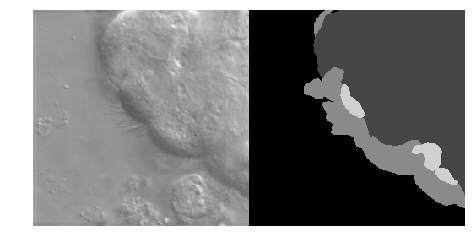

In [110]:
def no_axis():
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

no_axis()
img, lab = next(train_generator0)
n = 0
plt.imshow(np.hstack([img[n][:, :, 0], np.divide(np.reshape(lab[n], SIZE), 4)]), cmap='gray')
# plt.show()

## fc densenet model

In [111]:
def relu(x): return Activation('relu') (x)
def dropout(x, p): return Dropout(p) (x) if p else x
def bn(x): return BatchNormalization(axis=-1) (x)
def relu_bn(x): return relu(bn(x))
def concat(xs): return concatenate(xs, axis=-1)
def reverse(a): return list(reversed(a))


def conv(x, nf, sz, wd, p, stride=1): 
    x = Conv2D(nf, (sz, sz), strides=(stride, stride), padding='same',
               kernel_initializer='he_uniform', kernel_regularizer=l2(wd)) (x)
    
    return dropout(x, p)

def conv_relu_bn(x, nf, sz=3, wd=0, p=0, stride=1): 
    return conv(relu_bn(x), nf, sz, wd=wd, p=p, stride=stride)

def dense_block(n, x, growth_rate, p, wd):
    added = []
    for i in range(n):
        b = conv_relu_bn(x, growth_rate, p=p, wd=wd)
        x = concat([x, b])
        added.append(b)
    return x, added

def transition_dn(x, p, wd):
    return conv_relu_bn(x, x.get_shape().as_list()[-1], sz=1, p=p, wd=wd, stride=2)

def down_path(x, nb_layers, growth_rate, p, wd):
    skips = []
    for i, n in enumerate(nb_layers):
        x, added = dense_block(n, x, growth_rate, p, wd)
        skips.append(x)
        x = transition_dn(x, p=p, wd=wd)
    return skips, added

def transition_up(added, wd=0):
    x = concat(added)
    _, r, c, ch = x.get_shape().as_list()
    return Conv2DTranspose(ch, (3, 3), input_shape=(r, c, ch),
                           padding='same', strides=(2, 2),
                           kernel_initializer='he_uniform', 
                           kernel_regularizer=l2(wd)) (x)
    
def up_path(added, skips, nb_layers, growth_rate, p, wd):
    for i,n in enumerate(nb_layers):
        x = transition_up(added, wd)
        x = concat([x, skips[i]])
        x, added = dense_block(n, x, growth_rate, p, wd)
    return x

def create_tiramisu(nb_classes, img_input, nb_dense_block=6, 
    growth_rate=16, nb_filter=48, nb_layers_per_block=5, p=None, wd=0):
    
    if type(nb_layers_per_block) is list or type(nb_layers_per_block) is tuple:
        nb_layers = list(nb_layers_per_block)
    else: nb_layers = [nb_layers_per_block] * nb_dense_block

    x = conv(img_input, nb_filter, 3, wd, 0)
    skips,added = down_path(x, nb_layers, growth_rate, p, wd)
    x = up_path(added, reverse(skips[:-1]), reverse(nb_layers[:-1]), growth_rate, p, wd)
    
    x = conv(x, nb_classes, 1, wd, 0)
    _, r, c, f = x.get_shape().as_list()
    x = Reshape((-1, nb_classes))(x)
    return Activation('softmax')(x)

In [121]:
def compile_model(alpha=1e-3, nb_dense_block=6, growth_rate=16, number_of_filters=48,
                  layers=[4,5,7,10,12], dropout=None, weight_decay=0):
    
    number_of_classes=4
    img_input = Input(shape=(SIZE[0], SIZE[1], 3))
    
    x = create_tiramisu(number_of_classes, img_input,
                        growth_rate=16,
                        nb_filter=number_of_filters,
                        nb_layers_per_block=layers,
                        p=dropout, wd=weight_decay)
    
    model = Model(img_input, x)
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(alpha), metrics=["accuracy"])

    return model


def train(model, epochs=4):
    # total iterations is epochs x 16
    n_samples = int(NUM_TRAIN/BATCH)
    train_generators = [train_generator0, 
                        train_generator1,
                        train_generator2,
                        train_generator3,
                        train_generator4,
                        train_generator5,
                        train_generator6,
                        train_generator7,
                        train_generator8,
                        train_generator9,
                        train_generator10,
                        train_generator11,
                        train_generator12,
                        train_generator13,
                        train_generator14,
                        train_generator15]
    
    valid_generators = [valid_generator0,
                        valid_generator1,
                        valid_generator2,
                        valid_generator3, 
                        valid_generator4,
                        valid_generator5,
                        valid_generator6,
                        valid_generator7, 
                        valid_generator8,
                        valid_generator9,
                        valid_generator10,
                        valid_generator11,
                        valid_generator12,
                        valid_generator13,
                        valid_generator14,
                        valid_generator15]
    
    for i in range(16):
        print('{} frames'.format(i))    
        model.fit_generator(train_generators[i], 
                    steps_per_epoch=n_samples,
                    epochs=epochs, verbose=1, #callbacks=callbacks,
                    validation_data=valid_generators[i], 
                    validation_steps=n_samples)

def plot(model, num=8):
    for n in range(num):
        _ = model.predict(np.expand_dims(te0[n], 0))
        plt.figure(figsize=(14, 6))
        plt.imshow(np.hstack([te0[n][:,:,0],
                              np.divide(np.resize(np.argmax(_, axis=-1), SIZE), 4),
                              np.divide(test_labs[n], 4)]), cmap='gray')
        
#         plt.show()

def save_model(model, name, weights_only=False): # takes forever to save
    if weights_only:
        model.save_weights(name)
    else:
        model.save(name)

def save_predictions(folder='four_classes/'):
    SAVE_PATH = '/home/clu/cilia/pred/' + folder
    if not os.path.exists(SAVE_PATH):
        os.mkdir(SAVE_PATH)
        
    for i in valid_idx:
        file = os.path.split(frame_0[i])[1][:-4]
        _ = open_image(frame_0[i], resize=True)
        _ = np.divide(_, 255.)
        _ = model.predict(np.expand_dims(_, 0))
        _ = np.resize(np.argmax(_, axis=-1), SIZE)
        np.save(SAVE_PATH + file + '_prediction.npy', _)
        

## train model

In [113]:
m = compile_model(layers=[4,5,7,10], dropout=0.5)

In [132]:
m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
conv2d_483 (Conv2D)              (None, 256, 256, 48)  1344        input_7[0][0]                    
____________________________________________________________________________________________________
batch_normalization_471 (BatchNo (None, 256, 256, 48)  192         conv2d_483[0][0]                 
____________________________________________________________________________________________________
activation_477 (Activation)      (None, 256, 256, 48)  0           batch_normalization_471[0][0]    
___________________________________________________________________________________________

In [128]:
m = compile_model(layers=[4,5,7,10], dropout=0.5)

In [129]:
train(m)

0 frames
Epoch 1/4
50/50 [==============================] - 64s - loss: 1.4655 - acc: 0.4956 - val_loss: 2.7369 - val_acc: 0.4419
Epoch 2/4
50/50 [==============================] - 40s - loss: 1.0527 - acc: 0.5886 - val_loss: 1.6519 - val_acc: 0.4685
Epoch 3/4
50/50 [==============================] - 41s - loss: 0.9461 - acc: 0.6428 - val_loss: 3.2436 - val_acc: 0.4775
Epoch 4/4
50/50 [==============================] - 41s - loss: 0.9277 - acc: 0.6350 - val_loss: 1.9371 - val_acc: 0.4822
1 frames
Epoch 1/4
50/50 [==============================] - 41s - loss: 0.9075 - acc: 0.6405 - val_loss: 1.2014 - val_acc: 0.4835
Epoch 2/4
50/50 [==============================] - 41s - loss: 0.9155 - acc: 0.6202 - val_loss: 1.0828 - val_acc: 0.5330
Epoch 3/4
50/50 [==============================] - 41s - loss: 0.8696 - acc: 0.6597 - val_loss: 0.8910 - val_acc: 0.6440
Epoch 4/4
50/50 [==============================] - 41s - loss: 0.8500 - acc: 0.6764 - val_loss: 0.9537 - val_acc: 0.6276
2 frames
Epoch

/home/clu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


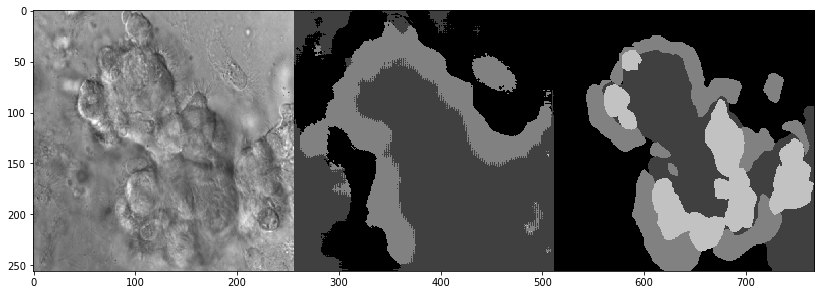

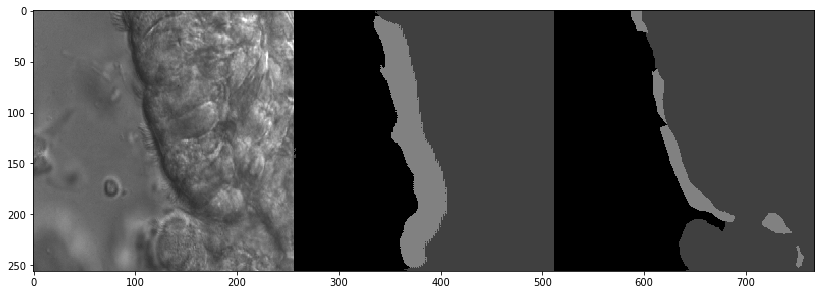

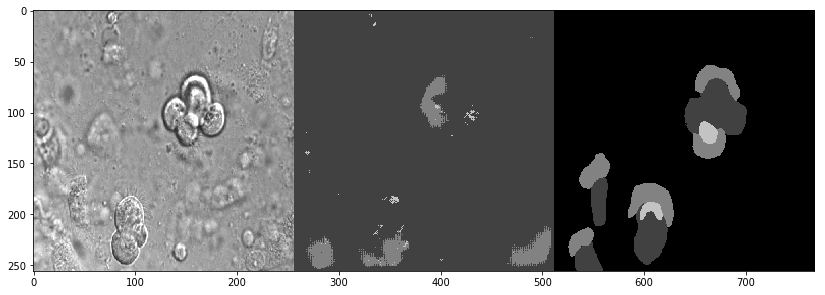

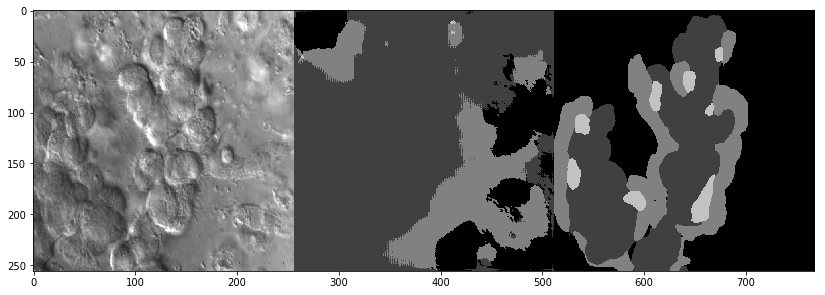

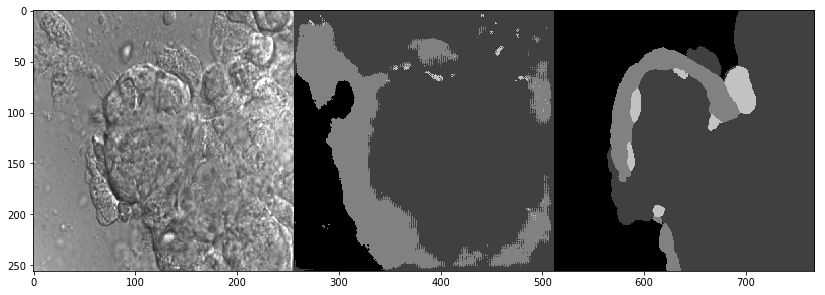

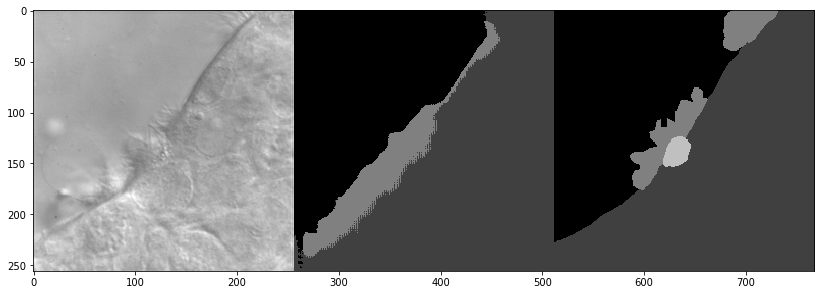

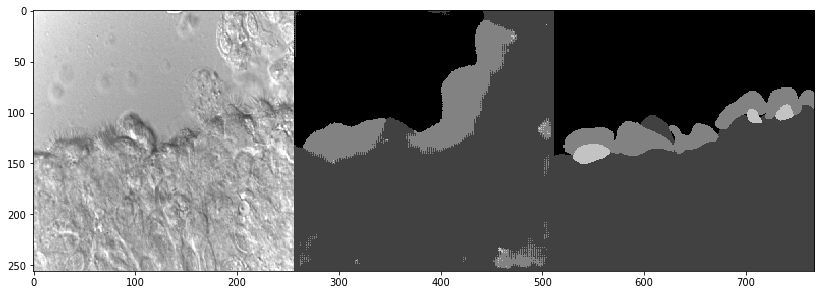

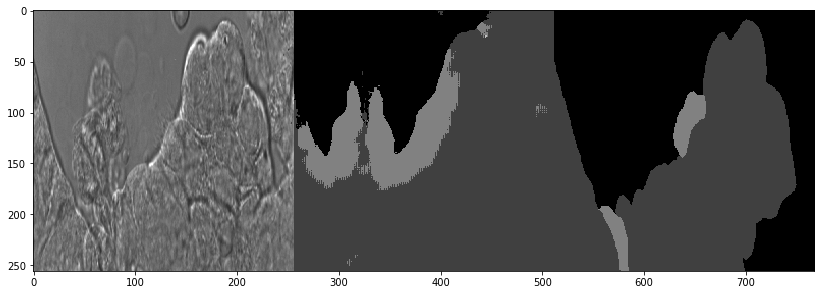

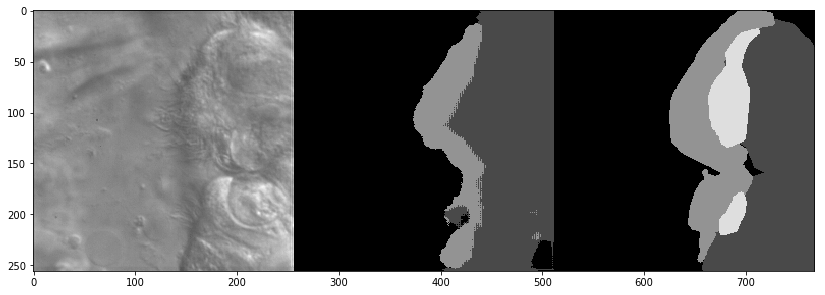

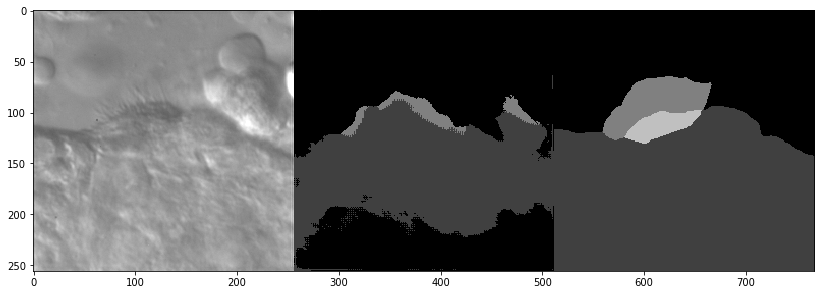

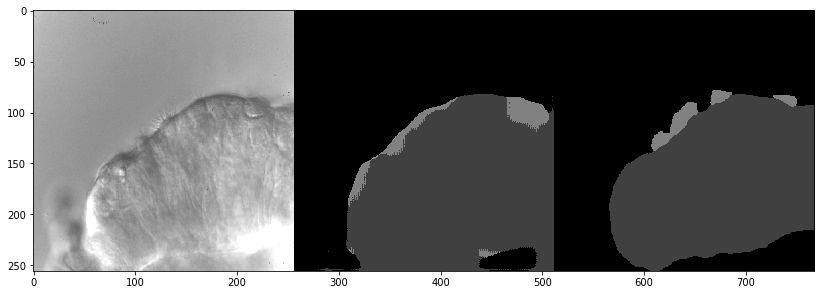

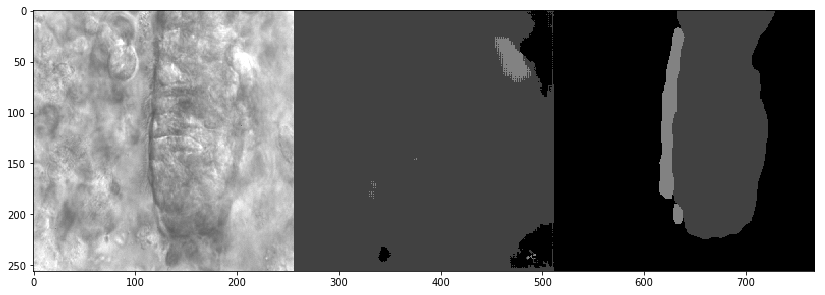

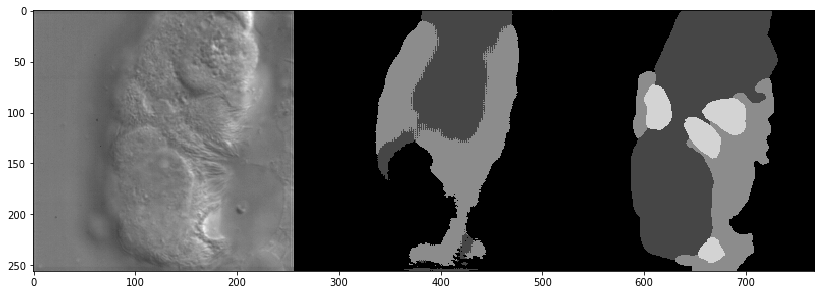

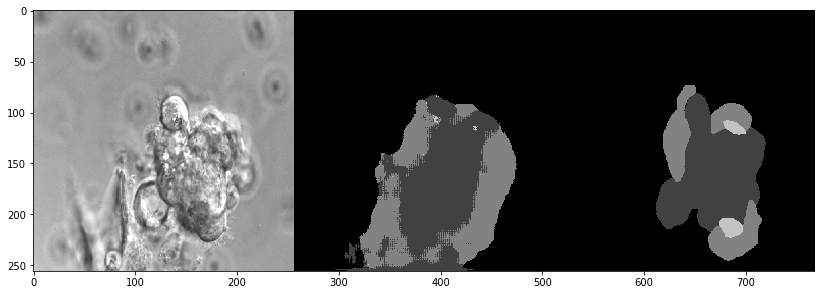

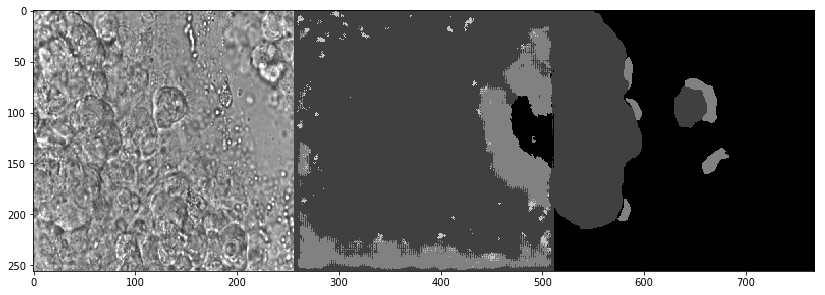

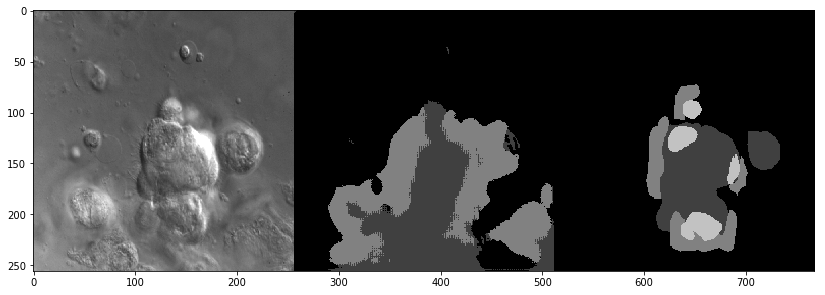

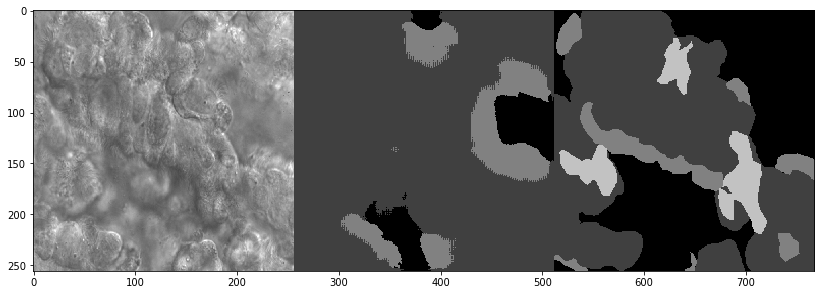

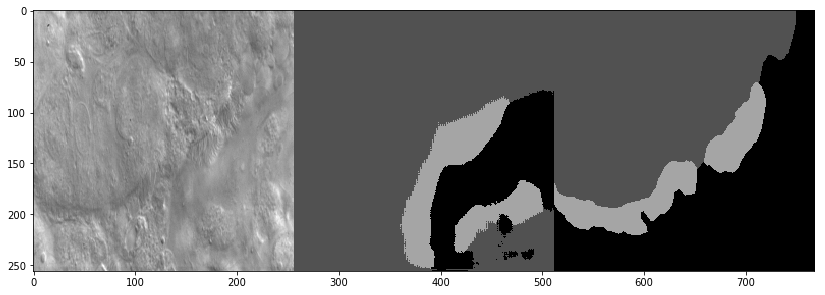

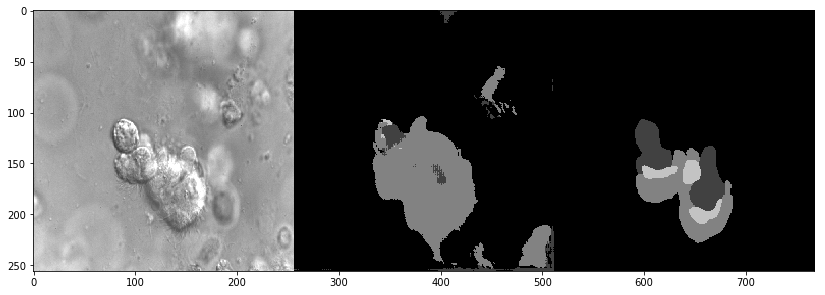

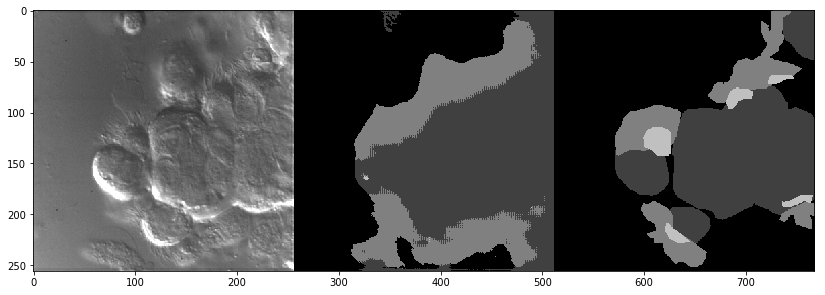

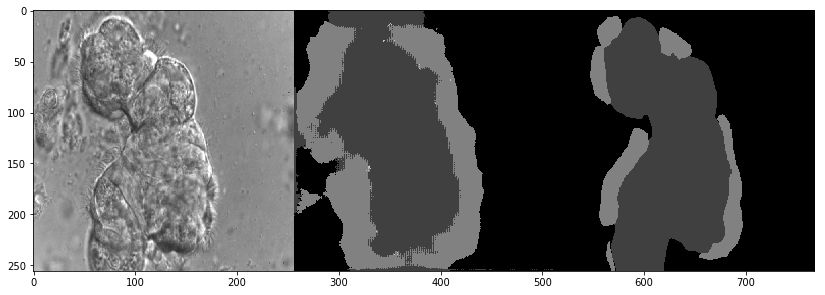

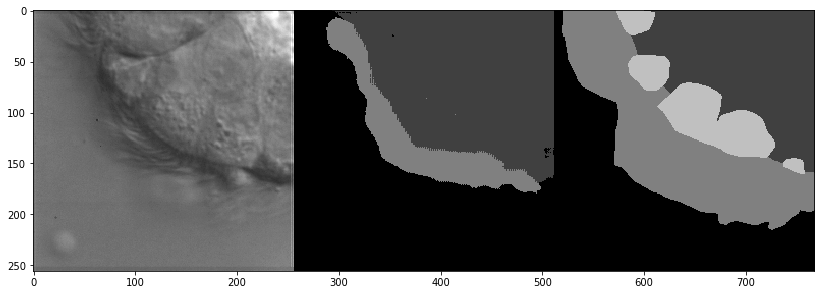

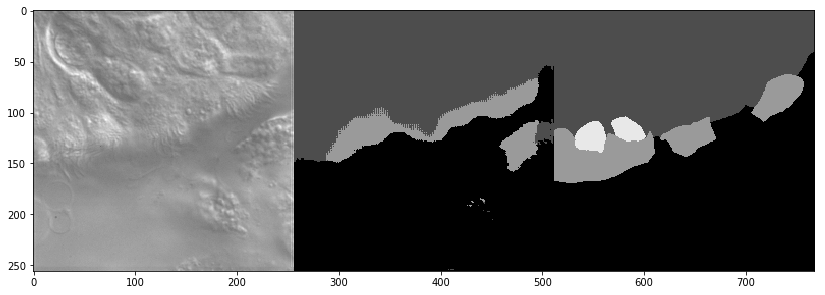

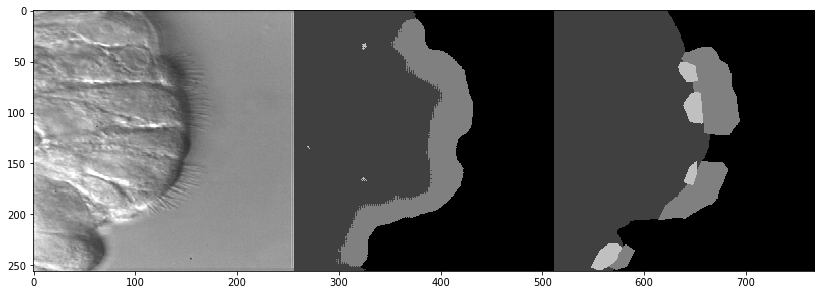

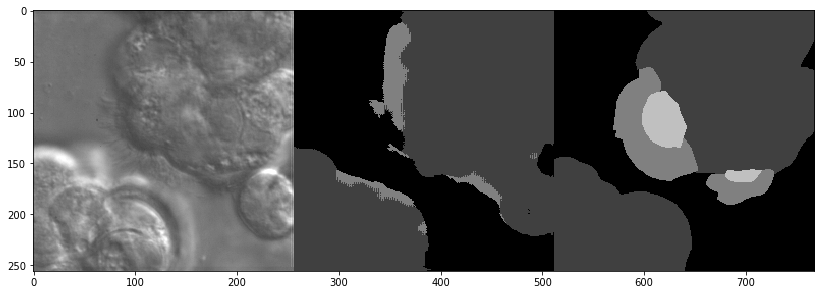

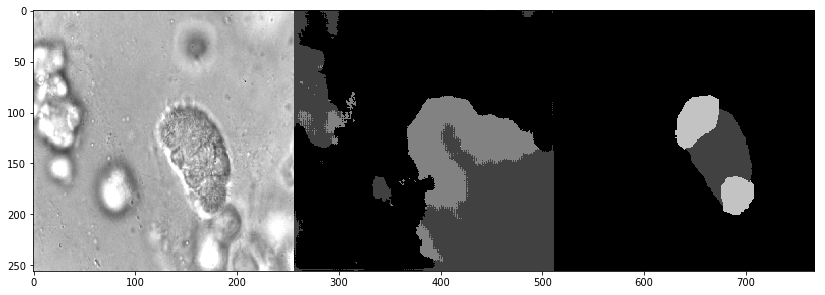

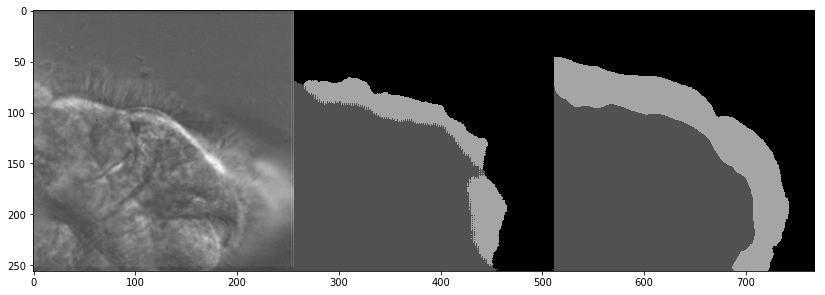

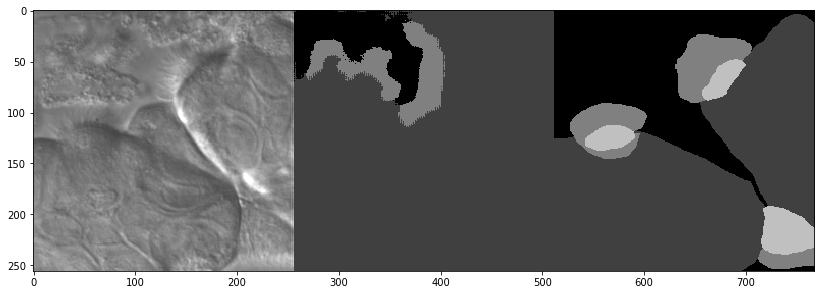

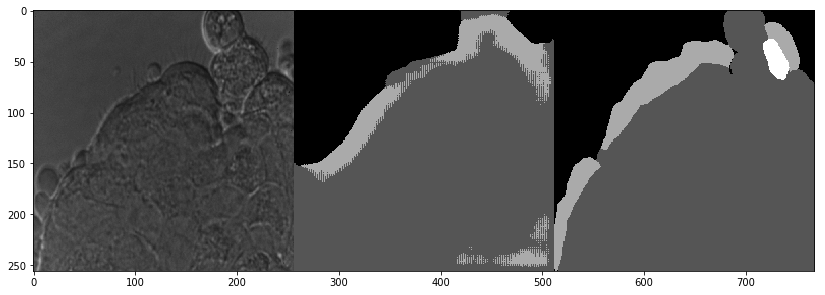

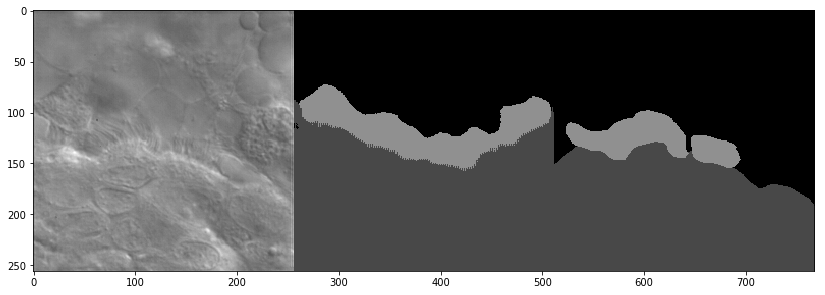

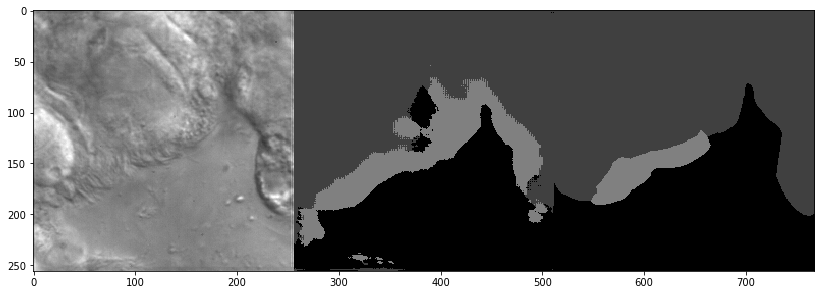

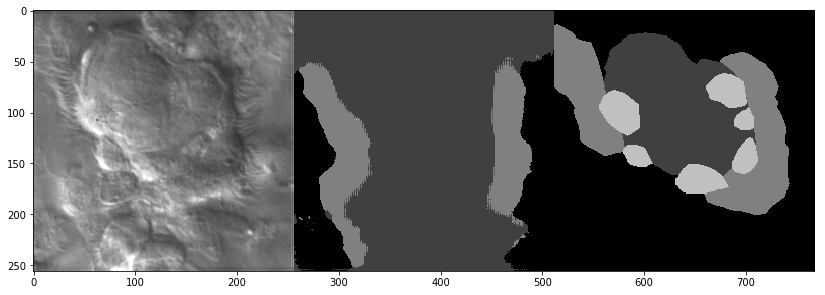

In [130]:
plot(m, num=32)

In [131]:
save_model(m, 'cilia-keras-fc-densenet-55-four-classes.h5')

## statistics
*TODO*

**DICE**
  
**IOU**